In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as f
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
data = pd.read_csv("heart_disease_uci.csv")
data.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','DISEASE']

data = data.replace('?',np.nan).dropna()

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,DISEASE
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,DISEASE
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,54.513514,0.675676,3.165541,131.648649,247.398649,0.141892,0.993243,149.597973,0.327703,1.051351,1.597973,0.949324
std,9.051631,0.468915,0.958262,17.775956,52.078915,0.349530,0.994879,22.980401,0.470171,1.165841,0.613848,1.235410
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.250000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


C:\Users\drkum\AppData\Local\Temp\ipykernel_9888\1082477376.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(),rotation=45);


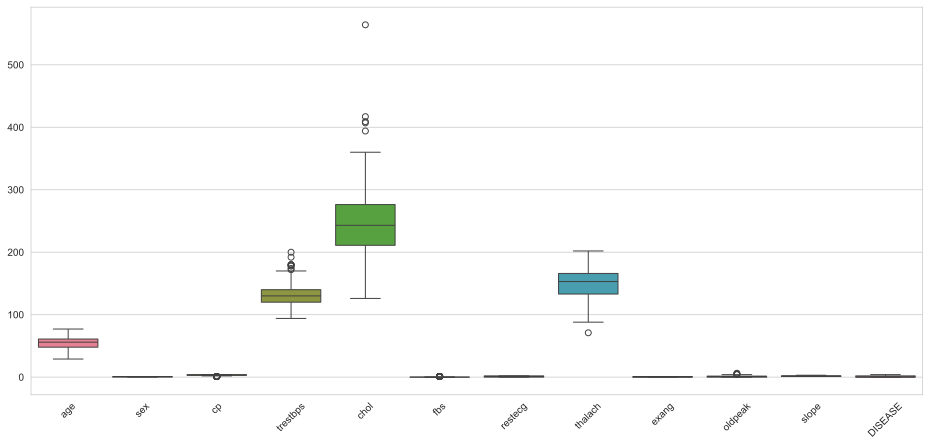

In [4]:
_,ax = plt.subplots(1,figsize=(16,7))
ax = sns.boxplot(data=data)
ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(),rotation=45);

In [5]:
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop(['sex','fbs','exang','DISEASE'])

for c in cols2zscore:
    d = pd.to_numeric(data[c]) # force to numeric (addresses some data-format issues)
    data[c] = (d - d.mean())/d.std(ddof=1)

C:\Users\drkum\AppData\Local\Temp\ipykernel_9888\3693108974.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


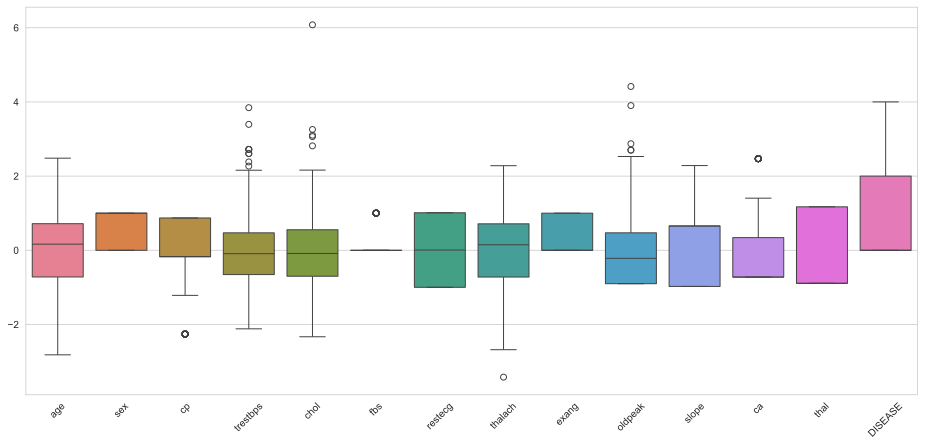

In [6]:
fig,ax = plt.subplots(1,figsize=(16,7))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

In [7]:
data['DISEASE'].value_counts()

DISEASE
0    159
1     54
2     35
3     35
4     13
Name: count, dtype: int64

In [8]:
data['DISEASE'][data['DISEASE'] > 0] = 1
data = data[data['chol'] <= 4]
data = data[data['thalach'] > -3]
data = data[data['oldpeak'] <= 3]
data = data[data['trestbps'] <= 3]
data = data[data['chol'] <= 3]
data = data[data['oldpeak'] <= 3]

C:\Users\drkum\AppData\Local\Temp\ipykernel_9888\4141875731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DISEASE'][data['DISEASE'] > 0] = 1


C:\Users\drkum\AppData\Local\Temp\ipykernel_9888\3693108974.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


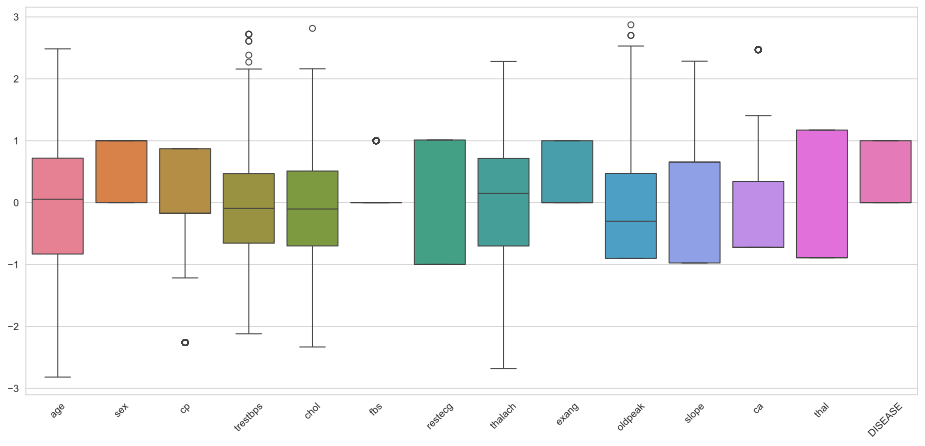

In [9]:
fig,ax = plt.subplots(1,figsize=(16,7))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

In [10]:
dataT  = torch.tensor( data[data.keys().drop('DISEASE')].values ).float()
labels = torch.tensor( data['DISEASE'].values ).float()

print( dataT.shape )
print( labels.shape )

labels = labels[:,None]
print( labels.shape )

torch.Size([287, 13])
torch.Size([287])
torch.Size([287, 1])


In [11]:
train_data,test_data, train_labels,test_labels = train_test_split(dataT, labels, test_size=0.3)

train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)

batch_size    = 20
train_loader = DataLoader(train_data,batch_size=batch_size,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [12]:
for x, y in train_loader:
    print(x.shape,  y.shape)

torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])


In [13]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Linear(13,32)
        self.fc1 = nn.Linear(32,64)
        self.fc2 = nn.Linear(64,10)
        self.output = nn.Linear(10,1)

    def forward(self,x):
        x = f.relu( self.input(x) )
        x = f.relu( self.fc1(x) )
        x = f.relu( self.fc2(x) )
        return self.output(x)

In [14]:
model = Model()
optimizer = torch.optim.Adam(model.parameters(),lr=.0001)
loss_fun = nn.BCEWithLogitsLoss()

num_epochs = 150

train_loss = torch.zeros(num_epochs)
test_loss  = torch.zeros(num_epochs)
train_acc  = torch.zeros(num_epochs)
test_acc   = torch.zeros(num_epochs)

for epoch in range(num_epochs):
    
    batch_loss = []
    for x, y in train_loader:

        y_hat = model(x)
        loss = loss_fun(y_hat,y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        batch_loss.append(loss.item())

        predictions = (torch.sigmoid(y_hat)>.5).float()
        train_acc[epoch] = 100*torch.mean((predictions==y).float())

    train_loss[epoch] = np.mean(batch_loss)

    x, y = next(iter(test_loader))
    y_hat = model(x)
    
    loss = loss_fun(y_hat, y)
    test_loss[epoch] = loss.item()

    predictions = (torch.sigmoid(y_hat)>.5).float()
    test_acc[epoch] = 100*torch.mean((predictions==y).float())

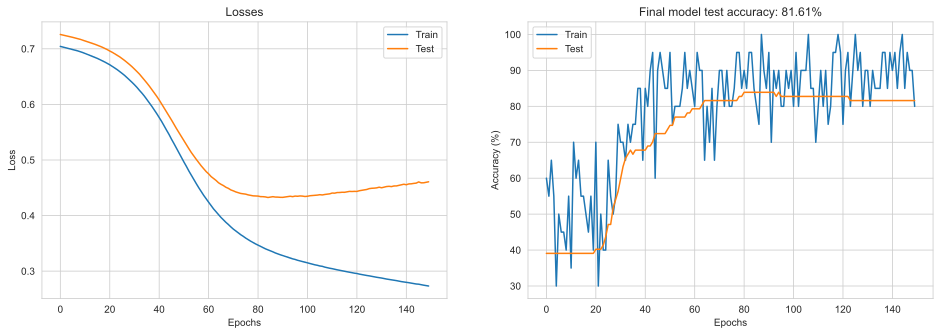

In [15]:
_, ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(train_loss,'-',label='Train')
ax[0].plot(test_loss,'-',label='Test')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Losses')
ax[0].legend()

ax[1].plot(train_acc,'-',label='Train')
ax[1].plot(test_acc,'-',label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_title(f'Final model test accuracy: {test_acc[-1]:.2f}%')
ax[1].legend();